In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# First dataset cyclists 

In [15]:
import pandas as pd
# Load the CSV file from the 'dataset' folder
df = pd.read_csv('../dataset/cyclists.csv')
# Display the first few rows of the dataframe
df.head()


,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [17]:
df.dtypes

_url            object
name            object
birth_year     float64
weight         float64
height         float64
nationality     object
dtype: object

In [18]:
df_only_number = df.select_dtypes(include="number")
print(df_only_number)

      birth_year  weight  height
0         1964.0     NaN     NaN
1         1965.0    74.0   182.0
2         1996.0    69.0   189.0
3         1995.0    78.0   192.0
4         1997.0    55.0   171.0
...          ...     ...     ...
6129      1966.0     NaN     NaN
6130      1998.0    75.0   188.0
6131      1973.0     NaN     NaN
6132      1985.0    58.0   170.0
6133      1999.0    75.0   186.0

[6134 rows x 3 columns]


In [19]:
df_no_number = df.select_dtypes(exclude="number")
print(df_no_number)

                         _url                  name  nationality
0                 bruno-surra          Bruno  Surra        Italy
1                  gerard-rue           Gérard  Rué       France
2                    jan-maas             Jan  Maas  Netherlands
3        nathan-van-hooydonck  Nathan Van Hooydonck      Belgium
4            jose-felix-parra     José Félix  Parra        Spain
...                       ...                   ...          ...
6129  juan-jose-martinez-diaz   Juan José  Martínez        Spain
6130           inigo-elosegui       Iñigo  Elosegui        Spain
6131           paolo-alberati       Paolo  Alberati        Italy
6132        jackson-rodriguez    Jackson  Rodríguez    Venezuela
6133             ward-vanhoof         Ward  Vanhoof      Belgium

[6134 rows x 3 columns]


In [20]:
df.shape

(6134, 6)

In [21]:
df[df["birth_year"] >= 2000]

,_url,name,birth_year,weight,height,nationality
38,thomas-gloag,Thomas Gloag,2001.0,60.0,181.0,Great Britain
80,thibau-nys,Thibau Nys,2002.0,64.0,176.0,Belgium
88,juan-ayuso-pesquera,Juan Ayuso,2002.0,65.0,183.0,Spain
127,joseba-lopez-cuesta,Joseba López,2000.0,66.0,182.0,Spain
156,hugo-page,Hugo Page,2001.0,71.0,185.0,France
...,...,...,...,...,...,...
6075,ruben-simao,Rúben Simão,2000.0,NaN,NaN,Portugal
6116,gianmarco-garofoli,Gianmarco Garofoli,2002.0,63.0,181.0,Italy
6120,kim-heiduk,Kim Heiduk,2000.0,70.0,184.0,Germany
6121,jacob-hindsgaul-madsen,Jacob Hindsgaul,2000.0,67.0,190.0,Denmark


In [22]:
df.describe()

,birth_year,weight,height
count,6121.000000,3078.000000,3143.000000
mean,1974.071884,68.658739,179.815145
std,15.535834,6.348183,6.443447
min,1933.000000,48.000000,154.000000
25%,1962.000000,64.000000,175.000000
50%,1974.000000,69.000000,180.000000
75%,1987.000000,73.000000,184.000000
max,2004.000000,94.000000,204.000000


No duplicates!!!

In [23]:
dup_df = df[df.duplicated(keep=False)]
dup_df.head()

,_url,name,birth_year,weight,height,nationality


In [24]:
df.isnull().sum()

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

In [25]:
df[df.isnull().any(axis=1)]

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
6,willy-moonen,Willy Moonen,1947.0,NaN,NaN,Belgium
9,scott-davies,Scott Davies,NaN,NaN,NaN,NaN
10,stian-remme,Stian Remme,1982.0,NaN,NaN,Norway
13,evgueny-anachkine,Evgueny Anachkine,1970.0,NaN,NaN,Russia
...,...,...,...,...,...,...
6124,henri-vandenabeele,Henri Vandenabeele,2000.0,NaN,181.0,Belgium
6127,hendrik-van-dyck,Hendrik Van Dyck,1974.0,NaN,NaN,Belgium
6128,francisco-jose-pacheco,Francisco José Pacheco,1982.0,NaN,NaN,Spain
6129,juan-jose-martinez-diaz,Juan José Martínez,1966.0,NaN,NaN,Spain


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Heatmap of Missing Values')

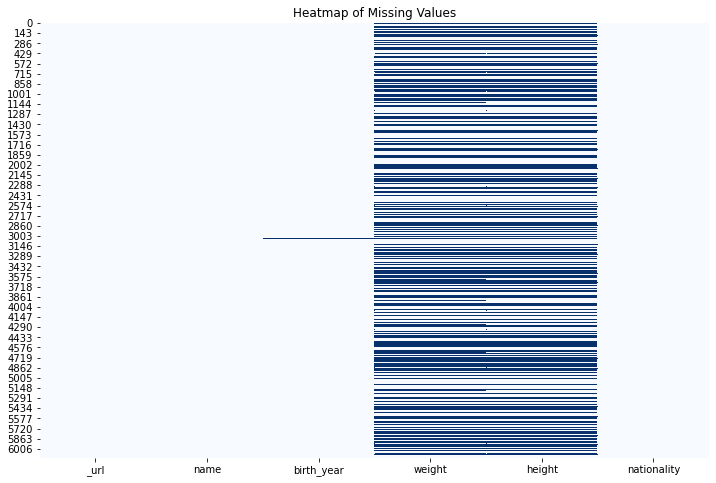

In [29]:
# set figure dimension 
plt.figure(figsize=(12, 8))

# create heatmap of missing values
# visualize boolean matrix (null, not null) as a heatmap 
# cmap --> defines color palette ('coolwarm', 'Blues')
# cbar=False --> remove side bar with colors
sns.heatmap(df.isnull(), cmap='Blues', cbar=False)

# add a title 
plt.title('Heatmap of Missing Values')

In [30]:
dataset_no_null_values = df.dropna()
print(dataset_no_null_values)

                      _url                  name  birth_year  weight  height  \
1               gerard-rue           Gérard  Rué      1965.0    74.0   182.0   
2                 jan-maas             Jan  Maas      1996.0    69.0   189.0   
3     nathan-van-hooydonck  Nathan Van Hooydonck      1995.0    78.0   192.0   
4         jose-felix-parra     José Félix  Parra      1997.0    55.0   171.0   
5          manuel-penalver      Manuel  Peñalver      1998.0    67.0   177.0   
...                    ...                   ...         ...     ...     ...   
6125       santos-gonzalez      Santos  González      1973.0    70.0   179.0   
6126     johannes-adamietz    Johannes  Adamietz      1998.0    61.0   174.0   
6130        inigo-elosegui       Iñigo  Elosegui      1998.0    75.0   188.0   
6132     jackson-rodriguez    Jackson  Rodríguez      1985.0    58.0   170.0   
6133          ward-vanhoof         Ward  Vanhoof      1999.0    75.0   186.0   

      nationality  
1          France  

In [31]:
dataset_no_null_values.shape

(3071, 6)

In [32]:
dataset_no_null_values.isnull().sum()

_url           0
name           0
birth_year     0
weight         0
height         0
nationality    0
dtype: int64

Deleting null values we get half of the records of the original dataset

# Second dataset: races 

In [34]:
df2 = pd.read_csv('../dataset/races.csv')
df2.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [36]:
df2.describe()

,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist_age,delta
count,589388.000000,251086.000000,589865.000000,442820.000000,441671.000000,589865.000000,29933.000000,589865.000000,589752.000000,589865.000000
mean,89.221635,74.601547,166776.180584,2330.469215,2.611611,1101.161178,21.731768,74.219491,28.486208,418.292794
std,54.435330,100.947962,64545.605664,1375.710722,1.491741,380.586928,5.884761,48.404023,3.855631,842.961596
min,18.000000,6.000000,1000.000000,2.000000,1.000000,115.000000,10.000000,0.000000,13.000000,-6906.000000
25%,50.000000,16.000000,152500.000000,1309.000000,1.000000,844.000000,17.000000,32.000000,26.000000,10.000000
50%,80.000000,60.000000,178200.000000,2255.000000,2.000000,988.000000,22.000000,70.000000,28.000000,156.000000
75%,100.000000,100.000000,203500.000000,3273.000000,4.000000,1309.000000,26.000000,112.000000,31.000000,624.000000
max,350.000000,800.000000,338000.000000,6974.000000,5.000000,2047.000000,36.000000,209.000000,56.000000,61547.000000


In [37]:
dup_df2 = df2[df2.duplicated(keep=False)]
dup_df2.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta


In [38]:
df2.isnull().sum()

_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Heatmap of Missing Values')

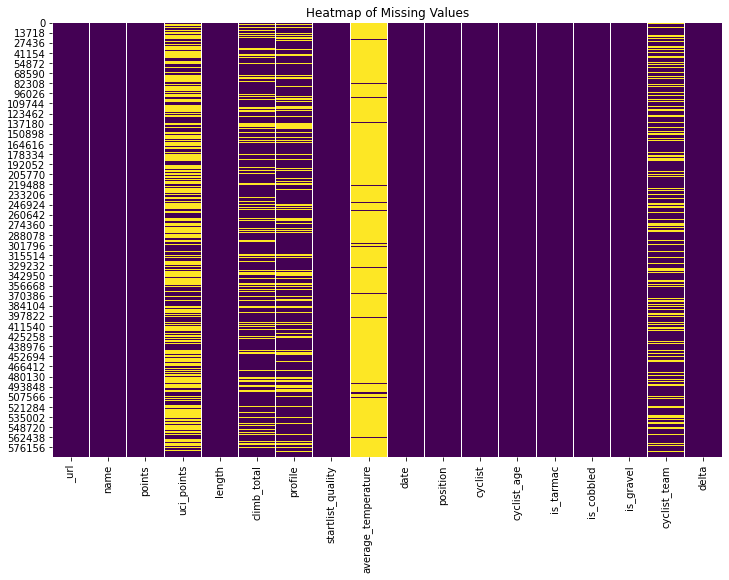

In [41]:
# set figure dimension 
plt.figure(figsize=(12, 8))

# create heatmap of missing values
# visualize boolean matrix (null, not null) as a heatmap 
# cmap --> defines color palette ('coolwarm', 'Blues')
# cbar=False --> remove side bar with colors
sns.heatmap(df2.isnull(), cmap='viridis', cbar=False)

# add a title 
plt.title('Heatmap of Missing Values')

# Merge the 2 datasets 
different types of joint ('inner', 'left', 'right') --> e.g. use left if you want to preserve the rows of the left table even if there is no match on the joint attribute

In [53]:
merged_data = pd.merge(df2, df, left_on='cyclist', right_on='_url', how='inner')
merged_data.head()

,_url_x,name_x,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,...,is_cobbled,is_gravel,cyclist_team,delta,_url_y,name_y,birth_year,weight,height,nationality
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,vini-ricordi-pinarello-sidermec-1986,0.0,sean-kelly,Sean Kelly,1956.0,77.0,180.0,Ireland
1,tour-de-france/1978/stage-14,Tour de France,100.0,NaN,52000.0,1351.0,5.0,1241,NaN,1978-07-14 01:37:33,...,False,False,vini-ricordi-pinarello-sidermec-1986,702.0,sean-kelly,Sean Kelly,1956.0,77.0,180.0,Ireland
2,ronde-van-vlaanderen/1980/result,Ronde van Vlaanderen / Tour des Flandres,275.0,NaN,265000.0,NaN,NaN,602,NaN,1980-03-30 06:39:30,...,False,False,australia-1983,165.0,sean-kelly,Sean Kelly,1956.0,77.0,180.0,Ireland
3,vuelta-a-espana/1980/stage-19,Vuelta a España,80.0,NaN,84000.0,NaN,NaN,520,NaN,1980-05-11 01:49:42,...,False,False,australia-1983,0.0,sean-kelly,Sean Kelly,1956.0,77.0,180.0,Ireland
4,tour-de-suisse/1983/stage-5b,Tour de Suisse,50.0,NaN,19000.0,NaN,NaN,809,NaN,1983-06-19 00:39:13,...,False,False,kelme-costa-blanca-2000,0.0,sean-kelly,Sean Kelly,1956.0,77.0,180.0,Ireland


In [54]:
merged_data.shape

(589865, 24)

In [55]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589865 entries, 0 to 589864
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url_x               589865 non-null  object 
 1   name_x               589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [56]:
dup_merged_data = merged_data[merged_data.duplicated(keep=False)]
dup_merged_data.head()

,_url_x,name_x,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,...,is_cobbled,is_gravel,cyclist_team,delta,_url_y,name_y,birth_year,weight,height,nationality


In [57]:
merged_data.isnull().sum()

_url_x                      0
name_x                      0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
_url_y                      0
name_y                      0
birth_year                113
weight                 111434
height                 110119
nationality                52
dtype: int64

Text(0.5, 1.0, 'Heatmap of Missing Values')

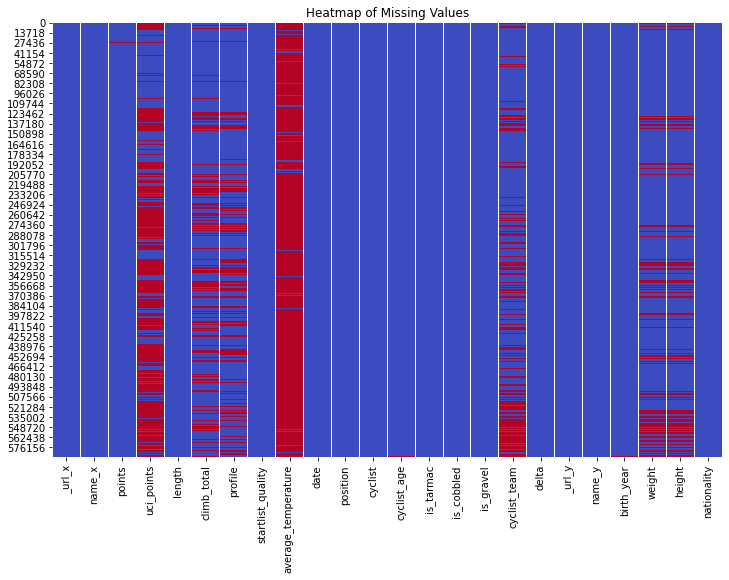

In [58]:
# set figure dimension 
plt.figure(figsize=(12, 8))

# create heatmap of missing values
# visualize boolean matrix (null, not null) as a heatmap 
# cmap --> defines color palette ('coolwarm', 'Blues')
# cbar=False --> remove side bar with colors
sns.heatmap(merged_data.isnull(), cmap='coolwarm', cbar=False)

# add a title 
plt.title('Heatmap of Missing Values')

Select only not-null rows in merged dataframe

In [60]:
merged_data_non_null = merged_data.dropna()
print(merged_data_non_null)

                                   _url_x  \
10985        vuelta-a-espana/2022/stage-2   
10998       tour-de-romandie/2022/stage-1   
11017         tour-de-suisse/2022/stage-1   
11021       vuelta-a-espana/2021/stage-15   
11062         tour-de-suisse/2022/stage-4   
...                                   ...   
589397  dwars-door-vlaanderen/2022/result   
589399   liege-bastogne-liege/2022/result   
589642   liege-bastogne-liege/2023/result   
589643      la-fleche-wallone/2022/result   
589646           e3-harelbeke/2023/result   

                                                 name_x  points  uci_points  \
10985                       La Vuelta ciclista a España    80.0       100.0   
10998                                  Tour de Romandie    50.0        60.0   
11017                                    Tour de Suisse    50.0        60.0   
11021                       La Vuelta ciclista a España    80.0       100.0   
11062                                    Tour de Suisse    50.0 